# Digits

## Визуализация данных

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузка выборки

In [3]:
digits = datasets.load_digits()

In [4]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [14]:
print('target: %d' % digits.target[0])

print('features:\n{}'.format(digits.data[0]))

print('number of features: %d' % len(digits.data[0]))

target: 0
features:
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
number of features: 64


## Визуализация объектов выборки

In [15]:
print(digits.data[0].shape) # был вектор длинной 64 элемента

(64,)


In [16]:
print(digits.data[0].reshape(8, 8)) # преобразовали в матрицу размерностью 8 х 8

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [17]:
print(digits.data[0].reshape(8, 8).shape) # таблица с значениями цветов пикселей

(8, 8)


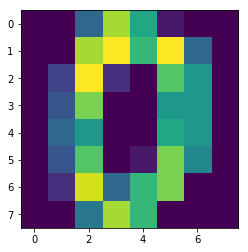

In [18]:
pylab.imshow(digits.data[0].reshape(8, 8))

In [20]:
print(digits.keys()) # в images содержатся уже преобразованные вектора

['images', 'data', 'target_names', 'DESCR', 'target']


In [21]:
print(digits.images[0])

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


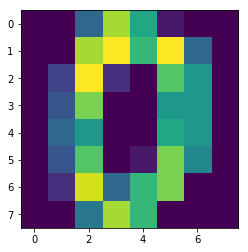

In [22]:
pylab.imshow(digits.images[0])

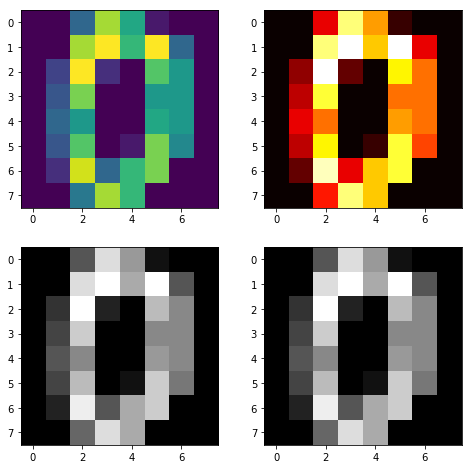

In [23]:
pyplot.figure(figsize = (8, 8))

pyplot.subplot(2, 2, 1)
pylab.imshow(digits.images[0])

pyplot.subplot(2, 2, 2)
pylab.imshow(digits.images[0], cmap = 'hot')

pyplot.subplot(2, 2, 3)
pylab.imshow(digits.images[0], cmap = 'gray')

pyplot.subplot(2, 2, 4)
pylab.imshow(digits.images[0], cmap = 'gray', interpolation = 'nearest')

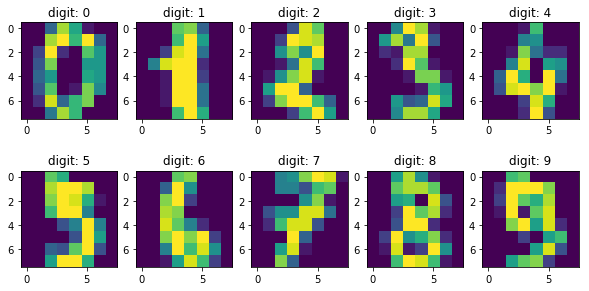

In [24]:
pyplot.figure(figsize = (10, 5))

# отрисуем числа от 0 до 9
for plot_number, plot in enumerate(digits.images[:10]):
    pyplot.subplot(2, 5, plot_number + 1)
    pylab.imshow(plot)
    pylab.title('digit: ' + str(digits.target[plot_number]))

## Уменьшение размерности

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from collections import Counter

In [27]:
# возьмем только первую 1000 элементов из выборки
data = digits.data[:1000]
labels = digits.target[:1000]

In [29]:
print(Counter(labels)) # соотношение класс - количество элементов в классе

Counter({3: 104, 1: 102, 6: 101, 2: 100, 5: 100, 0: 99, 7: 99, 9: 99, 4: 98, 8: 98})


<Container object of 10 artists>

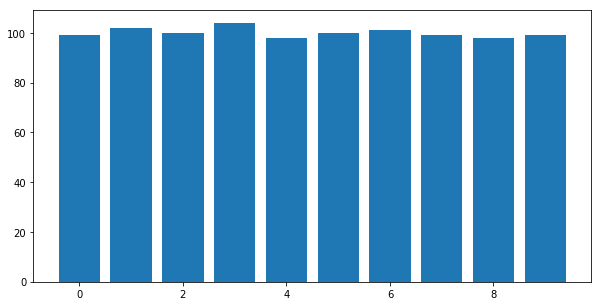

In [30]:
pylab.figure(figsize = (10, 5))
pylab.bar(Counter(labels).keys(), Counter(labels).values())

In [31]:
classifier = KNeighborsClassifier()
classifier.fit(data, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
print(classification_report(classifier.predict(data), labels)) # точность

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        99
          1       1.00      0.97      0.99       105
          2       1.00      1.00      1.00       100
          3       1.00      0.98      0.99       106
          4       1.00      1.00      1.00        98
          5       0.99      1.00      0.99        99
          6       1.00      1.00      1.00       101
          7       0.99      0.99      0.99        99
          8       0.97      0.99      0.98        96
          9       0.96      0.98      0.97        97

avg / total       0.99      0.99      0.99      1000



## Random projection

In [35]:
from sklearn import random_projection
projection = random_projection.SparseRandomProjection(n_components = 2, random_state = 0)
data_2d_rp = projection.fit_transform(data)

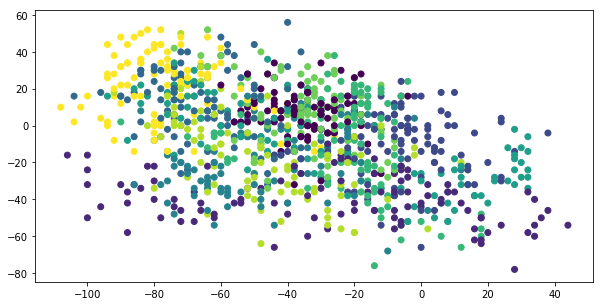

In [37]:
pylab.figure(figsize = (10, 5))
pylab.scatter(data_2d_rp[:, 0], data_2d_rp[:, 1], c = labels)

In [38]:
classifier.fit(data_2d_rp, labels)
print(classification_report(classifier.predict(data_2d_rp), labels))

             precision    recall  f1-score   support

          0       0.74      0.47      0.58       154
          1       0.75      0.58      0.65       131
          2       0.67      0.59      0.63       113
          3       0.71      0.51      0.60       144
          4       0.38      0.56      0.45        66
          5       0.42      0.53      0.47        79
          6       0.52      0.57      0.55        93
          7       0.35      0.51      0.42        69
          8       0.37      0.58      0.45        62
          9       0.62      0.69      0.65        89

avg / total       0.60      0.55      0.56      1000



## PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(svd_solver = 'randomized', n_components = 2, random_state = 0)
data_2d_pca = pca.fit_transform(data)

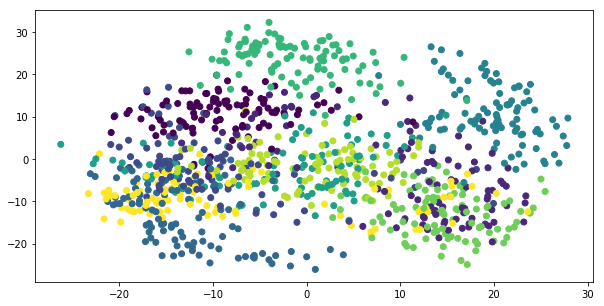

In [43]:
pylab.figure(figsize = (10, 5))
pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c = labels)

In [49]:
classifier.fit(data_2d_pca, labels)
print(classification_report(classifier.predict(data_2d_pca), labels))

             precision    recall  f1-score   support

          0       0.83      0.73      0.77       113
          1       0.56      0.54      0.55       105
          2       0.59      0.57      0.58       104
          3       0.77      0.79      0.78       101
          4       0.95      0.93      0.94       100
          5       0.56      0.54      0.55       104
          6       0.92      0.93      0.93       100
          7       0.76      0.71      0.74       105
          8       0.62      0.66      0.64        92
          9       0.52      0.67      0.58        76

avg / total       0.71      0.71      0.71      1000



## MDS

In [51]:
from sklearn import manifold

In [52]:
mds = manifold.MDS(n_components = 2, n_init = 1, max_iter = 100)
data_2d_mds = mds.fit_transform(data)

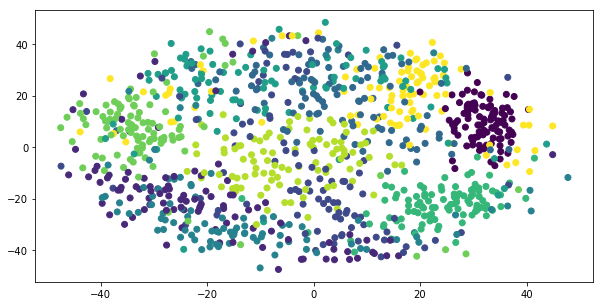

In [53]:
pylab.figure(figsize = (10, 5))
pylab.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c = labels)

In [54]:
classifier.fit(data_2d_mds, labels)
print(classification_report(classifier.predict(data_2d_mds), labels))

             precision    recall  f1-score   support

          0       0.98      0.84      0.90       116
          1       0.67      0.59      0.62       116
          2       0.58      0.62      0.60        93
          3       0.62      0.56      0.59       116
          4       0.61      0.69      0.65        87
          5       0.53      0.62      0.57        85
          6       0.88      0.86      0.87       104
          7       0.81      0.77      0.79       104
          8       0.73      0.73      0.73        99
          9       0.56      0.69      0.61        80

avg / total       0.71      0.70      0.70      1000



## t-SNE

In [57]:
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
data_2d_tsne = tsne.fit_transform(data)

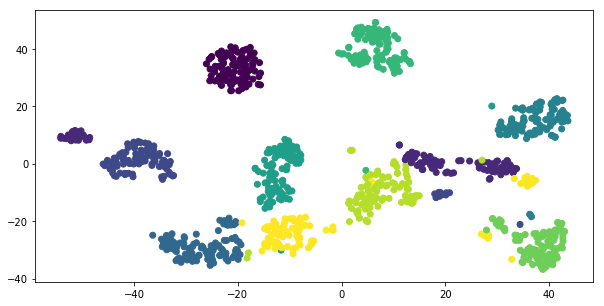

In [58]:
pylab.figure(figsize = (10, 5))
pylab.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = labels)

In [59]:
classifier.fit(data_2d_tsne, labels)
print(classification_report(classifier.predict(data_2d_tsne), labels))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        99
          1       1.00      0.99      1.00       103
          2       0.99      1.00      0.99        99
          3       1.00      0.97      0.99       107
          4       1.00      0.99      0.99        99
          5       0.98      1.00      0.99        98
          6       0.99      1.00      1.00       100
          7       0.99      0.98      0.98       100
          8       0.97      0.98      0.97        97
          9       0.97      0.98      0.97        98

avg / total       0.99      0.99      0.99      1000

